In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

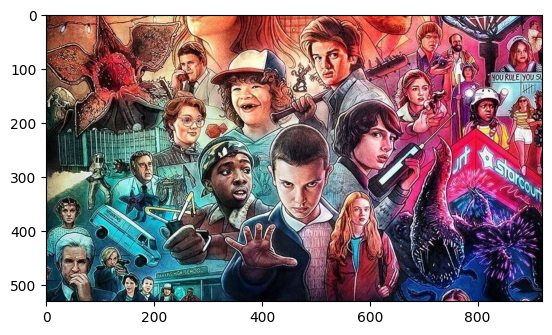

In [2]:
img = cv2.imread('data/osd.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Found 13 face(s)


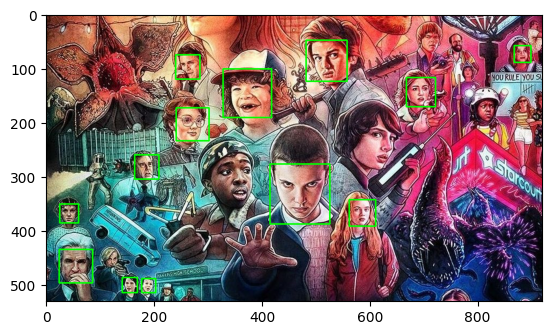

In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
'''
parameters:
    scaleFactor: Parameter specifying how much the image size is reduced at each image scale. 
        By rescaling the input image, you can resize a larger face to a smaller one, making it detectable by the algorithm
        Higher value results in smaller detection window
    minNeighbors: Parameter specifying how many neighbors each candidate rectangle should have to retain it.
        Higher value results in less detections but with higher quality
'''

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(img)
print(f'Found {len(faces)} face(s)')


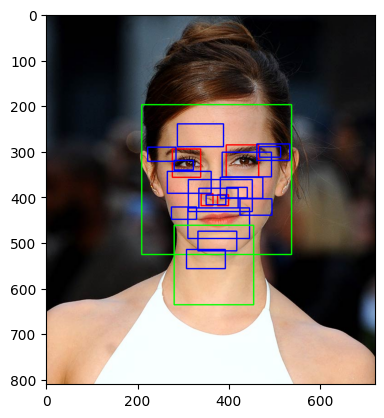

In [4]:
img = cv2.imread('data/face.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

face_rects = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
for (x, y, w, h) in face_rects:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_color = img[y:y+h, x:x+w]
    smile = smile_cascade.detectMultiScale(roi_color)
    eye = eye_cascade.detectMultiScale(roi_color)

    for (ex, ey, ew, eh) in eye:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)

    for (sx, sy, sw, sh) in smile:
        cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)

plt.imshow(img)

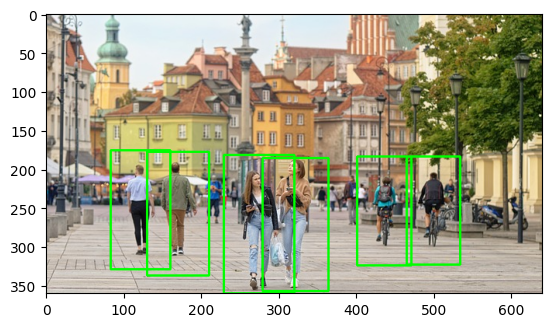

In [5]:
# count number of people using hog classifier

img = cv2.imread('data/people.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

scaling_factor = 1.5
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

people_rects, weights = hog.detectMultiScale(img, winStride=(4, 4), padding=(8, 8), scale=1.06)

for (x, y, w, h) in people_rects:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(img)

In [6]:
cap = cv2.VideoCapture('data/people.mp4')

scaling_factor = 1.5
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

while True:
    try:
        ret, frame = cap.read()
        frame = cv2.resize(frame, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

        people_rects, weights = hog.detectMultiScale(frame, winStride=(4, 4), padding=(8, 8), scale=1.06)

        for (x, y, w, h) in people_rects:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        cv2.startWindowThread()
        cv2.imshow('People Detector', frame)

        if cv2.waitKey(1) & 0XFF == ord('q'):
            break
    except:
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

1   HIToolbox                           0x000000018b8705c8 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 120
2   HIToolbox                           0x000000018b870188 _ZN15MenuBarInstance14EnableAutoShowEv + 60
3   HIToolbox                           0x000000018b813310 SetMenuBarObscured + 372
4   HIToolbox                           0x000000018b812ee8 _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 172
5   HIToolbox                           0x000000018b80cfcc _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 296
6   HIToolbox                           0x000000018b7d3cd0 _NotifyEventLoopObservers + 176
7   HIToolbox                           0x000000018b80c96c AcquireEventFromQueue + 432
8   HIToolbox                           0x000000018b7fbc84 ReceiveNextEventCommon + 320
9   HIToolbox                           0x000000018b7fbb2c _BlockUntilNextEventMatchingListInModeWithFilter + 72
10  AppKit                              0x00000001853a1838 _DPS

-1

In [7]:
# face recognition using on video

cap = cv2.VideoCapture('data/movie.mp4')

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    try:
        ret, frame = cap.read()
        frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

        face_rects = face_cascade.detectMultiScale(frame, scaleFactor=1.2, minNeighbors=3)
        for (x, y, w, h) in face_rects:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        cv2.startWindowThread()
        cv2.imshow('Face Detector', frame)

        if cv2.waitKey(1) & 0XFF == ord('q'):
            break
    except:
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1